### Bibliotecas e Funções

In [2]:
import pandas as pd
from scipy import stats
from math import sqrt, ceil
import matplotlib.pyplot as plt



In [3]:
def calc_metrics(df, column):
    return df[column].mean(), df[column].median(), df[column].std()

In [4]:
def calc_confidence_interval(t_student_value, mean, std, n ):
    lower = mean - (t_student_value) * (std)/sqrt(n)
    upper = mean + (t_student_value) * (std)/sqrt(n)
    
    return (lower, upper)


In [5]:
def calc_non_normal_confidence_interval(df, column, mean, confidence, n):
    se = stats.sem(df[column])
    h = se * stats.t._ppf((1+confidence)/2., n-1)
    
    return (mean - h, mean + h)


In [6]:
def calc_v_t_student(std1, std2, n1, n2=None):
    n2 = n1 if n2 is None else n2

    f1 = std1**2/n1
    f2 = std2**2/n2

    return ceil((f1+f2)**2/((f1**2/(n1-1))+(f2**2/(n2-1))))


In [7]:
def calc_confidence_interval_comp(t_student_value, mean1, mean2, std1, std2, n1, n2=None):
    n2 = n1 if n2 is None else n2

    f1 = std1**2/n1
    f2 = std2**2/n2

    lower = mean1 - mean2 - t_student_value * sqrt(f1 + f2)
    upper = mean1 - mean2 + t_student_value * sqrt(f1 + f2)

    return (lower, upper)


### 1 - Medidas de Velocidade

Método de Medição: Medição realizada via Wifi, uma vez que meus disposivos não possuem conectividade ethernet

Plano contratado: VERO - 680MB

Medidor Utilizado: [Speed Test](https://www.speedtest.net/)


In [8]:
idle = pd.read_csv('./data/erick/parado.csv')
idle

,fast_download,fast_upload,speed_download,speed_upload,nperf_download,nperf_upload
0,300,180,356.39,259.18,309.9,267.3
1,380,200,400.94,264.61,247.3,318.2
2,270,190,315.58,136.24,263.6,250.5
3,340,230,438.23,278.65,165.4,255.3
4,390,190,345.79,110.13,316.3,234.2
5,280,350,153.78,13.95,267.7,260.0
6,220,190,290.00,92.29,266.5,325.7
7,200,58,239.46,201.45,272.9,312.3
8,470,150,259.68,120.12,267.6,323.9
9,140,120,297.27,185.83,256.6,325.8


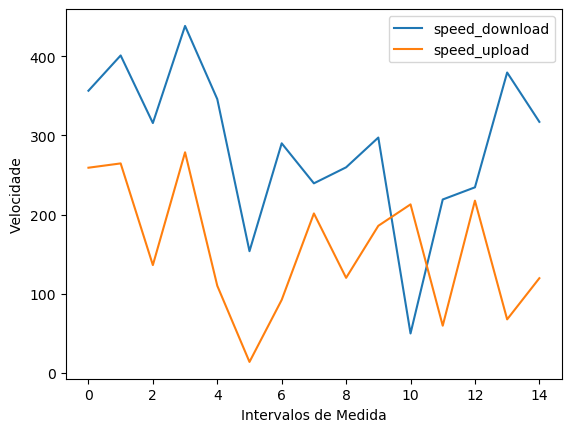

In [9]:
ax = idle[['speed_download', 'speed_upload']].plot()
ax.set_xlabel("Intervalos de Medida")
ax.set_ylabel("Velocidade")
plt.show()


In [10]:
download_mean, download_median, download_std = calc_metrics(idle, 'speed_download')

print(f'Média de Download: {download_mean}')
print(f'Mediana de Download: {download_median}')
print(f'Desvio Padrão: {download_std}')


Média de Download: 286.4653333333333
Mediana de Download: 297.27
Desvio Padrão: 99.58987146339351


In [11]:
upload_mean, upload_median, upload_std = calc_metrics(idle, 'speed_upload')

print(f'Média de Upload: {upload_mean}')
print(f'Mediana de Upload: {upload_median}')
print(f'Desvio Padrão: {upload_std}')

Média de Upload: 155.99666666666664
Mediana de Upload: 136.24
Desvio Padrão: 81.88706383678391


##### Considerando Distribuição Normal

Para o cálculo da média populacional vamos empregar o caso 4, presente nos slides:

Intervalo de confiança para a média populacional µ de uma distribuição normal com a variância populacional σ² desconhecida e amostra pequena:

In [12]:
confidence = .95
alpha = 1 - confidence

n = len(idle["speed_download"])
print(f't{round(alpha/2,3)}; {n-1}')

t0.025; 14


Buscamos o valor acima na tabela T-Student e dela retiramos 2.145

In [13]:
download_confidence = calc_confidence_interval(2.145, download_mean, download_std, n)

print(download_confidence)

(231.3088156844349, 341.62185098223176)


In [14]:
upload_confidence = calc_confidence_interval(2.145, upload_mean, upload_std, n)

print(upload_confidence)

(110.6446121317813, 201.348721201552)


##### Sem Considerar Distribuição Normal

In [15]:
n_download_confidence = calc_non_normal_confidence_interval(idle, 'speed_download', download_mean, confidence, n)

print(n_download_confidence)

(231.31430079011076, 341.6163658765559)


In [16]:
n_upload_confidence = calc_non_normal_confidence_interval(idle, 'speed_upload', upload_mean, confidence, n)

print(n_upload_confidence)

(110.64912222093024, 201.34421111240306)


### 2 - Comparando Medidores

Método de Medição: Medição realizada via Wifi, uma vez que meus disposivos não possuem conectividade ethernet

Plano contratado: VERO - 680MB

Medidores Utilizados: [Fast](https://fast.com/pt/#), [N Perf](https://www.nperf.com/pt/)


#### Medidor Fast

In [17]:
fast_download_mean, fast_download_median, fast_download_std = calc_metrics(idle, 'fast_download')

print(f'Média de Download: {fast_download_mean}')
print(f'Mediana de Download: {fast_download_median}')
print(f'Desvio Padrão: {fast_download_std}\n')

fast_upload_mean, fast_upload_median, fast_upload_std = calc_metrics(idle, 'fast_upload')

print(f'Média de Upload: {fast_upload_mean}')
print(f'Mediana de Upload: {fast_upload_median}')
print(f'Desvio Padrão: {fast_upload_std}')



Média de Download: 270.6666666666667
Mediana de Download: 270.0
Desvio Padrão: 94.90345971916234

Média de Upload: 165.73333333333332
Mediana de Upload: 180.0
Desvio Padrão: 71.97962674720304


#### Medidor nPerf


In [18]:
nperf_download_mean, nperf_download_median, nperf_download_std = calc_metrics(
    idle, 'nperf_download')

print(f'Média de Download: {nperf_download_mean}')
print(f'Mediana de Download: {nperf_download_median}')
print(f'Desvio Padrão: {nperf_download_std}\n')

nperf_upload_mean, nperf_upload_median, nperf_upload_std = calc_metrics(
    idle, 'nperf_upload')

print(f'Média de Upload: {nperf_upload_mean}')
print(f'Mediana de Upload: {nperf_upload_median}')
print(f'Desvio Padrão: {nperf_upload_std}')


Média de Download: 253.66
Mediana de Download: 263.6
Desvio Padrão: 38.01473022771192

Média de Upload: 284.12
Mediana de Upload: 267.3
Desvio Padrão: 36.16672108839443


In [19]:
n = len(idle['fast_download'])
confidence = .95

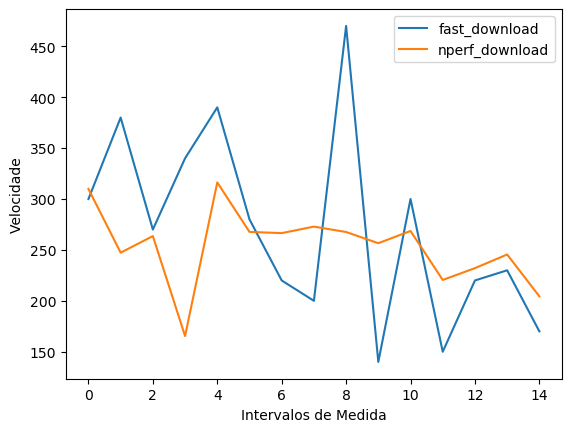

In [20]:
ax = idle[['fast_download', 'nperf_download']].plot()
ax.set_xlabel("Intervalos de Medida")
ax.set_ylabel("Velocidade")
plt.show()

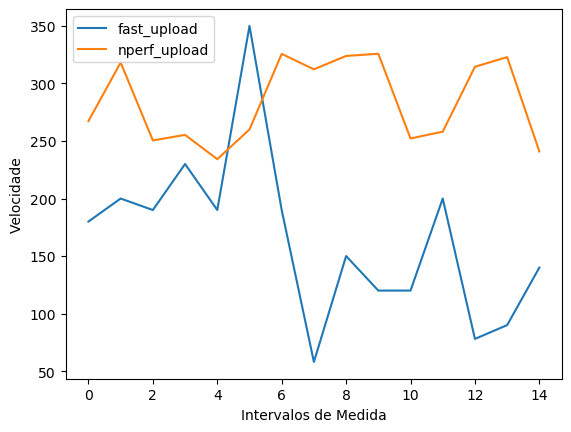

In [21]:
ax = idle[['fast_upload', 'nperf_upload']].plot()
ax.set_xlabel("Intervalos de Medida")
ax.set_ylabel("Velocidade")
plt.show()

$$H0: Download\;Fast = Download\;NPerf$$
$$H1: Download\;Fast > Download\;NPerf$$

In [22]:
v = calc_v_t_student(fast_download_std, nperf_download_std, n)
print(f't{round(1-confidence,3)}; {v}')

t0.05; 19


Buscamos o valor acima na tabela T-Student e dela retiramos 1.729.

Calculando o intervalo de confiança unilateral obtemos:

In [23]:
download_comp_interval = calc_confidence_interval_comp(
    1.729, fast_download_mean, nperf_download_mean, nperf_download_std, fast_download_std, n)
print(download_comp_interval)


(-28.633227235094793, 62.64656056842817)



---

$$H0: Upload\;NPerf = Upload\;Fast$$
$$H1: Upload\;NPerf > Upload\;Fast$$

In [24]:
v = calc_v_t_student(nperf_upload_std, fast_upload_std, n)
print(f't{round(1-confidence,3)}; {v}')


t0.05; 21


Buscamos o valor acima na tabela T-Student e dela retiramos 1.721.

Calculando o intervalo de confiança unilateral obtemos:

In [25]:
download_comp_interval = calc_confidence_interval_comp(
    1.721, nperf_upload_mean, fast_upload_mean, nperf_upload_std, fast_upload_std, n)
print(download_comp_interval)


(82.59125016516622, 154.18208316816714)


### 3 - Comparando Situações

In [26]:
idle = pd.read_csv('./data/erick/parado.csv')
video = pd.read_csv('./data/erick/video.csv')
stress = pd.read_csv('./data/erick/estresse.csv')

print('Parado')
display(idle)

print('Assistindo YouTube')
display(video)

print('Fazendo Download da ISO do W11')
display(stress)

Parado


,fast_download,fast_upload,speed_download,speed_upload,nperf_download,nperf_upload
0,300,180,356.39,259.18,309.9,267.3
1,380,200,400.94,264.61,247.3,318.2
2,270,190,315.58,136.24,263.6,250.5
3,340,230,438.23,278.65,165.4,255.3
4,390,190,345.79,110.13,316.3,234.2
5,280,350,153.78,13.95,267.7,260.0
6,220,190,290.00,92.29,266.5,325.7
7,200,58,239.46,201.45,272.9,312.3
8,470,150,259.68,120.12,267.6,323.9
9,140,120,297.27,185.83,256.6,325.8


Assistindo YouTube


,fast_download,fast_upload,speed_download,speed_upload
0,220,220,195.47,92.29
1,330,230,204.71,50.92
2,230,220,277.39,85.35
3,260,190,241.89,5.09
4,270,75,437.68,244.69
5,330,230,317.76,273.54
6,380,220,452.57,251.59
7,410,210,455.59,109.73
8,410,270,336.08,166.39
9,370,270,339.85,258.76


Fazendo Download da ISO do W11


,fast_download,fast_upload,speed_download,speed_upload
0,390,250,356.39,259.18
1,380,200,400.94,264.61
2,270,190,315.58,136.24
3,340,230,438.23,278.65
4,390,190,345.79,110.13
5,280,350,153.78,13.95
6,220,190,290.00,92.29
7,190,140,102.39,61.45
8,160,33,187.74,34.63
9,320,250,244.12,180.75


### 4 - Comparando Provedores

In [27]:
erick_idle = pd.read_csv('./data/erick/parado.csv')
carlos_idle = pd.read_csv('./data/carlos/parado.csv')

print('Erick | VERO - Parado')
display(idle)

print('Carlos | GUARA DIGITAL - Parado')
display(carlos_idle)

Erick | VERO - Parado


,fast_download,fast_upload,speed_download,speed_upload,nperf_download,nperf_upload
0,300,180,356.39,259.18,309.9,267.3
1,380,200,400.94,264.61,247.3,318.2
2,270,190,315.58,136.24,263.6,250.5
3,340,230,438.23,278.65,165.4,255.3
4,390,190,345.79,110.13,316.3,234.2
5,280,350,153.78,13.95,267.7,260.0
6,220,190,290.00,92.29,266.5,325.7
7,200,58,239.46,201.45,272.9,312.3
8,470,150,259.68,120.12,267.6,323.9
9,140,120,297.27,185.83,256.6,325.8


Carlos | GUARA DIGITAL - Parado


,fast_download,fast_upload,speed_download,speed_upload
0,38,19,35,19
1,39,20,33,19
2,38,21,38,18
3,31,23,40,19
4,38,19,34,20
5,34,21,36,18
6,10,19,35,20
7,15,19,31,18
8,38,19,32,20
9,35,21,30,20


#### Dados de Internet - Erick

In [28]:
e_fast_download_mean, e_fast_download_median, e_fast_download_std = calc_metrics(erick_idle, 'fast_download')

print(f'Erick Média de Download: {e_fast_download_mean}')
print(f'Erick Mediana de Download: {e_fast_download_median}')
print(f'Erick Desvio Padrão: {e_fast_download_std}\n')

e_fast_upload_mean, e_fast_upload_median, e_fast_upload_std = calc_metrics(erick_idle, 'fast_upload')

print(f'Erick Média de Upload: {e_fast_upload_mean}')
print(f'Erick Mediana de Upload: {e_fast_upload_median}')
print(f'Erick Desvio Padrão: {e_fast_upload_std}\n')

Erick Média de Download: 270.6666666666667
Erick Mediana de Download: 270.0
Erick Desvio Padrão: 94.90345971916234

Erick Média de Upload: 165.73333333333332
Erick Mediana de Upload: 180.0
Erick Desvio Padrão: 71.97962674720304



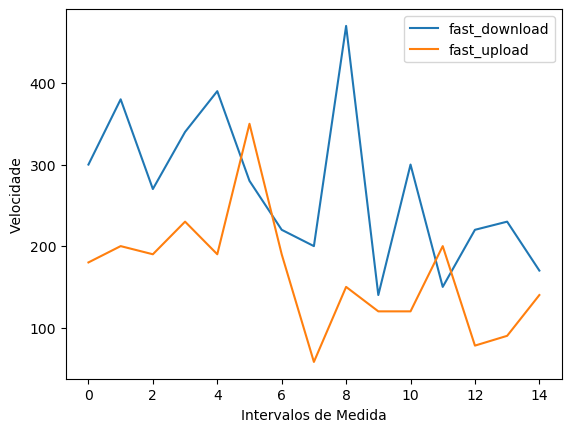

In [29]:
ax = erick_idle[['fast_download', 'fast_upload']].plot()
ax.set_xlabel("Intervalos de Medida")
ax.set_ylabel("Velocidade")
plt.show()

#### Dados de Internet - Carlos

In [30]:
c_fast_download_mean, c_fast_download_median, c_fast_download_std = calc_metrics(carlos_idle, 'fast_download')

print(f'Carlos Média de Download: {c_fast_download_mean}')
print(f'Carlos Mediana de Download: {c_fast_download_median}')
print(f'Carlos Desvio Padrão: {c_fast_download_std}\n')

c_fast_upload_mean, c_fast_upload_median, c_fast_upload_std = calc_metrics(carlos_idle, 'fast_upload')

print(f'Carlos Média de Upload: {c_fast_upload_mean}')
print(f'Carlos Mediana de Upload: {c_fast_upload_median}')
print(f'Carlos Desvio Padrão: {c_fast_upload_std}\n')

Carlos Média de Download: 33.333333333333336
Carlos Mediana de Download: 38.0
Carlos Desvio Padrão: 8.829064557040057

Carlos Média de Upload: 19.733333333333334
Carlos Mediana de Upload: 19.0
Carlos Desvio Padrão: 1.3870146083619754



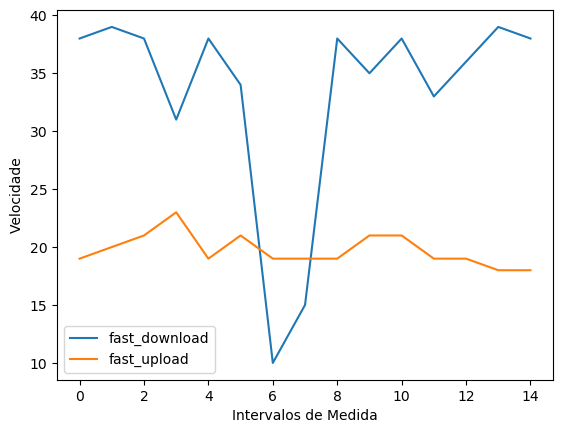

In [31]:
ax = carlos_idle[['fast_download', 'fast_upload']].plot()
ax.set_xlabel("Intervalos de Medida")
ax.set_ylabel("Velocidade")
plt.show()

In [32]:
n = len(erick_idle['fast_download'])
confidence = .95


$$H0: Erick\;Download = Carlos\;Download$$
$$H1: Erick\;Download > Carlos\;Download$$

In [33]:
v = calc_v_t_student(e_fast_download_std, c_fast_download_std, n)
print(f't{round(1-confidence,3)}; {v}')

t0.05; 15


Buscamos o valor acima na tabela T-Student e dela retiramos 1.753.

Calculando o intervalo de confiança unilateral obtemos:

In [34]:
group_download_comp_interval = calc_confidence_interval_comp(
    1.753, e_fast_download_mean, c_fast_download_mean, e_fast_download_std, c_fast_download_std, n)
print(group_download_comp_interval)


(194.19238905769595, 280.47427760897074)


---

$$H0: Erick\;Upload = Carlos\;Upload$$
$$H1: Erick\;Upload > Carlos\;Upload$$

In [35]:
v = calc_v_t_student(e_fast_upload_std, c_fast_upload_std, n)
print(f't{round(1-confidence,3)}; {v}')

t0.05; 15


Buscamos o valor acima na tabela T-Student e dela retiramos 1.753.

Calculando o intervalo de confiança unilateral obtemos:

In [36]:
group_upload_comp_interval = calc_confidence_interval_comp(
    1.753, e_fast_upload_mean, c_fast_upload_mean, e_fast_upload_std, c_fast_upload_std, n)
print(group_upload_comp_interval)

(113.41434223440459, 178.5856577655954)


### 5 - Comparação Multipla

Faremos a comparação múlitipla das 3 amostras coletadas no teste sem estresse (para os 3 medidores distintos) e verificaremos
se eles são estatísticamente iguais.

$$H0: Fast\;Upload = Speed\;Upload = NPerf\;Upload$$
$$H1: Pelo\;menos\;um\;medidor\;é\;diferente$$

Para confirmar ou rejeitar H0, usaremos o teste de Kruskal-Wallis a partir do seguinte código:

In [42]:
X = idle['fast_upload']
Y = idle['speed_upload']
Z = idle['nperf_upload']

s, pvalue = stats.kruskal(X,Y,Z)

pvalue

3.173457510948085e-05

$$H0: Fast\;Download = Speed\;Download = NPerf\;Download$$
$$H1: Pelo\;menos\;um\;medidor\;é\;diferente$$

In [43]:
X = idle['fast_download']
Y = idle['speed_download']
Z = idle['nperf_download']

s, pvalue = stats.kruskal(X,Y,Z)

pvalue

0.40366390636737126